<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/TareaRegresionClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=12cYJdWfM_vj2K8UwpV4vcy54BUIXLn7v" alt="d" width="950">

- **No olvidar hacer una copia a este Colab.**
- En este notebook se encuentran dos ejercicios uno para Regresion y otro de clasificación.
- La fecha límite de entrega es hasta el martes  02/04/2024.
- El pipeline recomendado a seguir para cada ejercicio es el que vieron en la primera clase:

    - Paso 1: Definición del problema
    - Paso 2: Recopilación de datos
    - Paso 3: Análisis de datos exploratorios (EDA)
    - Paso 4: Ingeniería de características
    - Paso 5: división de entrenamiento/prueba
    - Paso 6: Definición de métricas de evaluación del modelo
    - Paso 7: Selección, entrenamiento, predicción y evaluación del modelo
    - Paso 8: Ajuste de hiperparámetros/Mejora del modelo

# Rendimiento de cultivos agrícolas (Regresión)

### ***1. Definición del problema:***

 Nuestro objetivo es obtener información que los agricultores y otras partes interesadas agrícolas puedan utilizar para tomar decisiones informadas mediante el uso de modelos de aprendizaje automático para predecir el rendimiento de los cultivos.

### ***2. Recopilación de datos:***

Para esto usaremos el conjunto de datos [Agricultural Crop Yield in Indian States Dataset](https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset/data) que contiene:

- Crop: The name of the crop cultivated.
Crop_Year: The year in which the crop was grown.
- Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
- State: The Indian state where the crop was cultivated.
- Area: The total land area (in hectares) under cultivation for the specific crop.
- Production: The quantity of crop production (in metric tons).
Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
- Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
- Pesticide: The total amount of pesticide used for the crop (in kilograms).                              - Yield: The calculated crop yield (production per unit area).

Link para descargar el dataset:
https://drive.google.com/file/d/1k-xuuDizjLX4WJGOas-of52DEj2aoLyv/view?usp=sharing

### ***3. Análisis de datos exploratorios (EDA):***

Una vez descargado el dataset. Lee el archivo csv en un dataframe de Pandas y realiza una exploración de los datos. Verifica que no hayan datos faltantes.


### ***4: Ingeniería de características:***

Puedes decartar algunas columnas que no sean necesarias, realizar un ecoding y escalar los datos.

Como puedes haber notado hay columnas que son strings en el dataset que en realidad son categorias/clases en esa columna. Para poder usar esa información necesitamos codificarlas mediante variables numéricas que codificaran la información categórica. Eso podemos hacerlo mediante "one-hot encoding" o "dummy-encoding".

Pandas ya tiene implementado dummy encoding. En una variable dummy:

- Un 1 codifica la presencia de una categoría.
- Un 0 codifica la ausencia de una categoría.

Se puede observar en la figura como funciona dummy encoding con una columna que tiene dos categorias:




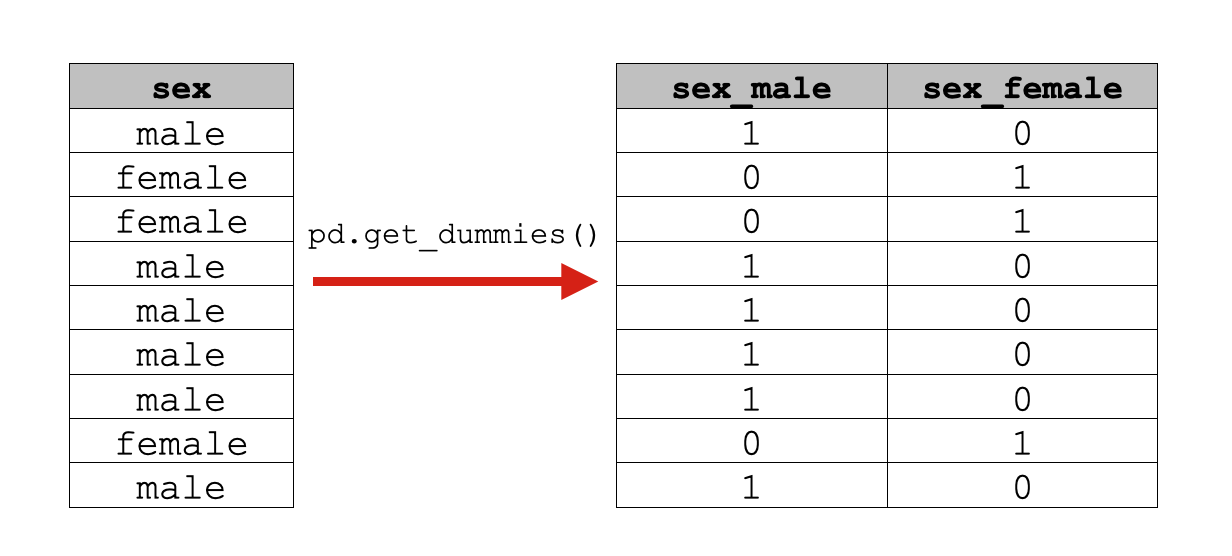

In [ ]:
# Con este codigo podemos ver que columnas son categoricas
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

In [ ]:
# Dummy encoding
df1 = pd.get_dummies(df, columns = category_columns, drop_first=True)
df1.shape

- Realiza un escalamiento en las columnas en caso sea necesario

### ***5. División de entrenamiento/prueba:***

Realiza la división de la data en tres conjuntos: Train (60 %), Test (20 %). Usa  `random_state = 10` al llamar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html )

### ***6. Métricas de evaluación del modelo:***



Para cuantificar la precisión predictiva en un regresor, encontramos el error de predicción, es decir, qué tan lejos están las predicciones de nuestro modelo del valor real. Para eso existen diferentes metricas:

- ***Mean Squared Error*** (Error Cuadratico Medio): MSE es una medida de la diferencia promedio entre el valor previsto y el valor real, nos da un valor positivo en unidades cuadradas y entre más cercano sea a cero es mejor.

$$ MSE = \frac{1}{\text{# total data points}}\sum_{\text{all data points}}(\text{predicted value} - \text{actual value})^2$$


- ***Root Mean Squared Error*** : la raiz cuadrada del MSE, MSE nos da el resultado en unidades cuadradas, para poder interpretarlo más fácilmente sacamos la raíz cuadrada y de esta manera tenemos el valor en las unidades originales.

- ***Mean absolute error*** Error absoluto medio (MAE), diferencia promedio entre dos valores, es decir, nos permite saber que tan diferente es el valor predicho y el valor real u observado.

- ***Coeficiente de Determinación $R^2$ *** Es un tipo diferente de métrica de regresión que mide qué tan bien el modelo explica la variación en los datos. R2 se calcula comparando la variación de los valores previstos con la variación de los valores reales. R2 varía de 0 a 1, y los valores más altos indican un mejor rendimiento. R2 es útil cuando se desea evaluar qué parte de la variabilidad de los datos captura el modelo, pero no indica la magnitud o dirección de los errores.


Puedes encontrar mas información de métricas para regresión en este [blog](https://medium.com/@nicolasarrioja/m%C3%A9tricas-en-regresi%C3%B3n-5e5d4259430b).

Todas estas métricas y otras más ya esta implementadas en SkLearn, puedes observarlas [aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).


Para este ejercicio usaremos una métrica común en regresión:  RMSE . Sin embargo, puedes explorar otras métricas.


### ***7. Selección, entrenamiento, predicción y evaluación del modelo***

Entrena diferentes modelos de Machine Learning con ayuda de Scikit-Learn, prueba con:(Ver ejemplos)

- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
-[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

Tambie puedes probar con otros modelos de regresión.

***8. Ajuste de hiperparámetros/Mejora del modelo***

Usa [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para ajustar los hiperparametros. GridSeacrhCV usa Cross-Validation, entonces por dentro define diferentes conjuntos de validacion, por lo que debemos pasarle nuestro conjunto de entrenamiento *train* completo.

Recuerda evaluar el desempeño de los modelos entrenados en el conjunto de validación, usaremos una métrica común en regresión: $RMSE$. Para eso usa como parametro `scoring = 'neg_root_mean_squared_error'`al momento de llamar a GridSearchCV. Recuerda multiplicar por -1 al momento de ver el score y así eliminar la parte negativa. Por ejemplo para  encontrar los hiperparametros para GradientBoosting sería así:



```
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 4,scoring = 'neg_root_mean_squared_error' , n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n", -1 * grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
```



    



### Responda las siguientes preguntas:

- **Pregunta:**  ¿ Cual fue el RMSE para cada modelo?

- **Pregunta:**  ¿Qué modelo obtuvo menor RMSE?

- **Pregunta:** Evalúa el desempeño del mejor modelo en el conjunto de test.



---



# Riesgo de enfermedad cardiovascular en adultos (Clasificación)

Encontrar un modelo con el cual se pueda saber si una persona tiene riesgo de padecer una enfermedad cardiovascular o no.

El [conjunto de datos](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data) que nos ayudará contiene información detallada sobre los factores de riesgo de enfermedad cardiovascular. Incluye información sobre edad, sexo, altura, peso, valores de presión arterial, niveles de colesterol, niveles de glucosa, hábitos de tabaquismo y consumo de alcohol de más de 70 mil personas. Además, describe si la persona es activa o no y si tiene alguna enfermedad cardiovascular.

Link para descargar dataset: https://drive.google.com/file/d/13-Ao93ilWG-hMGhpo8A3Vvm4IVP-lSmh/view?usp=sharing

Información del dataset: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data

Usa el mismo pipeline de Regresion.

Se puede intentar con los siguientes modelos:
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Support Vector Machine ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



Como vieron en la primera clase, existen diferentes métricar evaluar un clasificador:
- Feature weights: indica las principales características utilizadas por el modelo para generar las predicciones.
- Matriz de confusión: muestra una cuadrícula de predicciones verdaderas y falsas en comparación con los valores reales
- Accuracy: muestra la precisión general del modelo para el conjunto de entrenamiento y el conjunto de prueba
- Curva ROC: muestra la capacidad de diagnóstico de un modelo al reunir la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de predicciones de clase (ejemplo, umbrales de 10%, 50% o 90% resultando una predicción de  churn)
- AUC (para ROC): mide la separabilidad general entre clases del modelo relacionado con la curva ROC
- Precision-Recall-Curve: muestra la capacidad de diagnóstico al comparar la tasa de falsos positivos (FPR) y la tasa de falsos negativos (FNR) para diferentes umbrales de predicciones de clase. Es adecuado para conjuntos de datos con desequilibrios de clase altos (valores negativos sobrerrepresentados), ya que se centra en la precision y recall, que no dependen del número de verdaderos negativos y, por lo tanto, excluye el desequilibrio.
-  F1 score: construye la media armónica de precision y recall y, por lo tanto, mide el compromiso entre ambos.
- AUC (para PRC): mide la separabilidad general entre las clases del modelo en relación con la curva de Precision-Recall

$$ precision = \frac{TP}{TP+FP}$$

$$ recall = \frac{TP}{TP+FN}$$

$$ F_1 = 2\times \frac{precision\times recall}{precision+recall}$$

La métrica sobre la cual evaluaremos los modelos será: Area Under the Receiver Operating Characteristic Curve ([ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)), para tener en cuenta el desbalance que puede existir en los datos. Adicionalmente se recomienda observar la matriz de confusión.

### Responda las siguientes preguntas:

- **Pregunta:**  ¿ Cual fue el ROC AUC para cada modelo?

- **Pregunta:**  ¿Qué modelo obtuvo menor ROC AUC? Analiza su matriz de confusión.

- **Pregunta:** Evalúa el desempeño del mejor modelo en el conjunto de test. Analiza su matriz de confusión.



---

